In [49]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
# Path to folder with height CSV files and path to depth CSV file
height_folder_path = 'F:/dataprocessingstuff/phase2_separateclusters/testerheights'
depth_file_path = 'F:/dataprocessingstuff/phase2_separateclusters/sitesandheights.csv'

In [53]:
# Read the depth data
depth_df = pd.read_csv(depth_file_path)
depth_df.columns = ['Site', 'Depth']  # Make sure these column names match your file

In [55]:
# Initialize a dictionary to store average heights
average_heights = {}

In [57]:
# Loop through each file in the height folder
for file_name in os.listdir(height_folder_path):
    if file_name.endswith('.csv'):
        # Extract site name from file name
        site_name = file_name.split('_')[0]
        
        # Read height data
        height_df = pd.read_csv(os.path.join(height_folder_path, file_name))
        
        # Calculate the average height
        average_height = height_df['Height'].mean()  # Update 'Height' to match your column name
        average_heights[site_name] = average_height

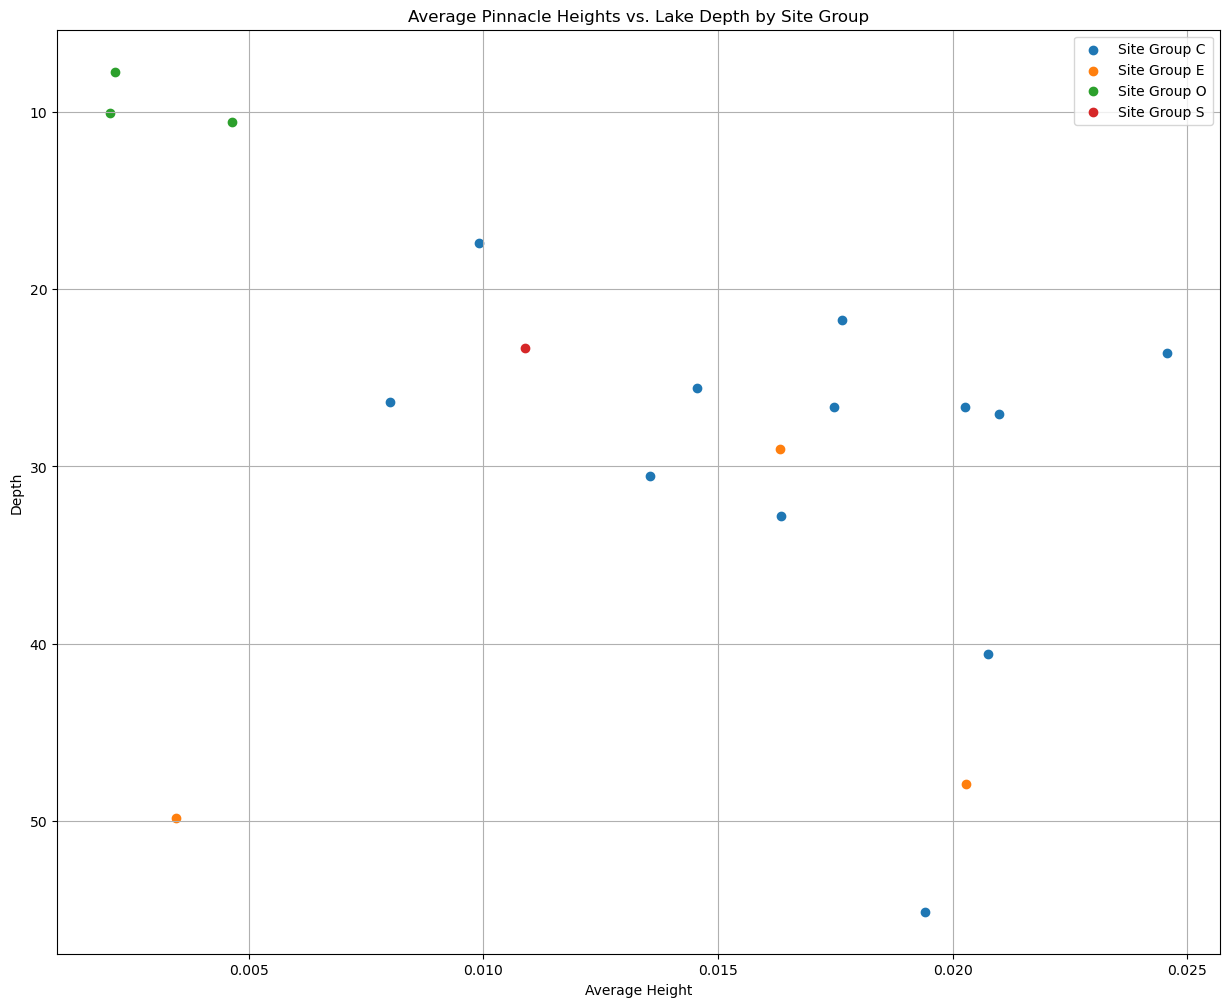

In [85]:
# Merge average heights with depth data
plot_data = depth_df.copy()
plot_data['Average_Height'] = plot_data['Site'].map(average_heights)

# Drop rows with missing values (in case any site is unmatched)
plot_data.dropna(inplace=True)

# Group the data by the first letter of the site name
plot_data['Site_Group'] = plot_data['Site'].str[0]  # Extract the first letter for grouping

# Define unique colors for each site group
site_groups = plot_data['Site_Group'].unique()
colors = plt.cm.tab10.colors  # Colormap with multiple colors
color_map = {group: colors[i % len(colors)] for i, group in enumerate(site_groups)}

# Plot each site group with a unique color
plt.figure(figsize=(15, 12))
for group, group_data in plot_data.groupby('Site_Group'):
    plt.scatter(group_data['Average_Height'], group_data['Depth'],
                color=color_map[group], label=f'Site Group {group}', marker='o')

# Customizing the plot
plt.xlabel('Average Height')
plt.ylabel('Depth')
plt.title('Average Pinnacle Heights vs. Lake Depth by Site Group')
plt.gca().invert_yaxis()  # Invert y-axis for depth visualization
plt.legend()
plt.grid(True)

# Save the figure
output_directory = 'F:/dataprocessingstuff/phase2_separateclusters/moransfigs'  # Specify your output directory
output_file_path = os.path.join(output_directory, 'average_heights_vs_depth.png')  # Specify the output filename
plt.savefig(output_file_path, format='png', bbox_inches='tight')  # Save the figure

# S

plt.show()

In [61]:
print(average_heights)

{'C10': 0.01747932091611875, 'C11': 0.020987046229151565, 'C12': 0.024563635849292692, 'C13': 0.017633365466126313, 'C1': 0.01633180612784256, 'C2': 0.020749285018129667, 'C3': 0.01941217743407579, 'C4': 0.02026044571720398, 'C5': 0.013558051524890745, 'C7': 0.009900209113186372, 'C8': 0.014551901521558845, 'C9': 0.007999703619216087, 'E2': 0.01632814087855903, 'E4': 0.0034407364261219617, 'E5': 0.02028388407598366, 'O1': 0.0046316783676663914, 'O3': 0.0020362585980557863, 'O4': 0.0021356660429150704, 'S4': 0.010876225811516402}


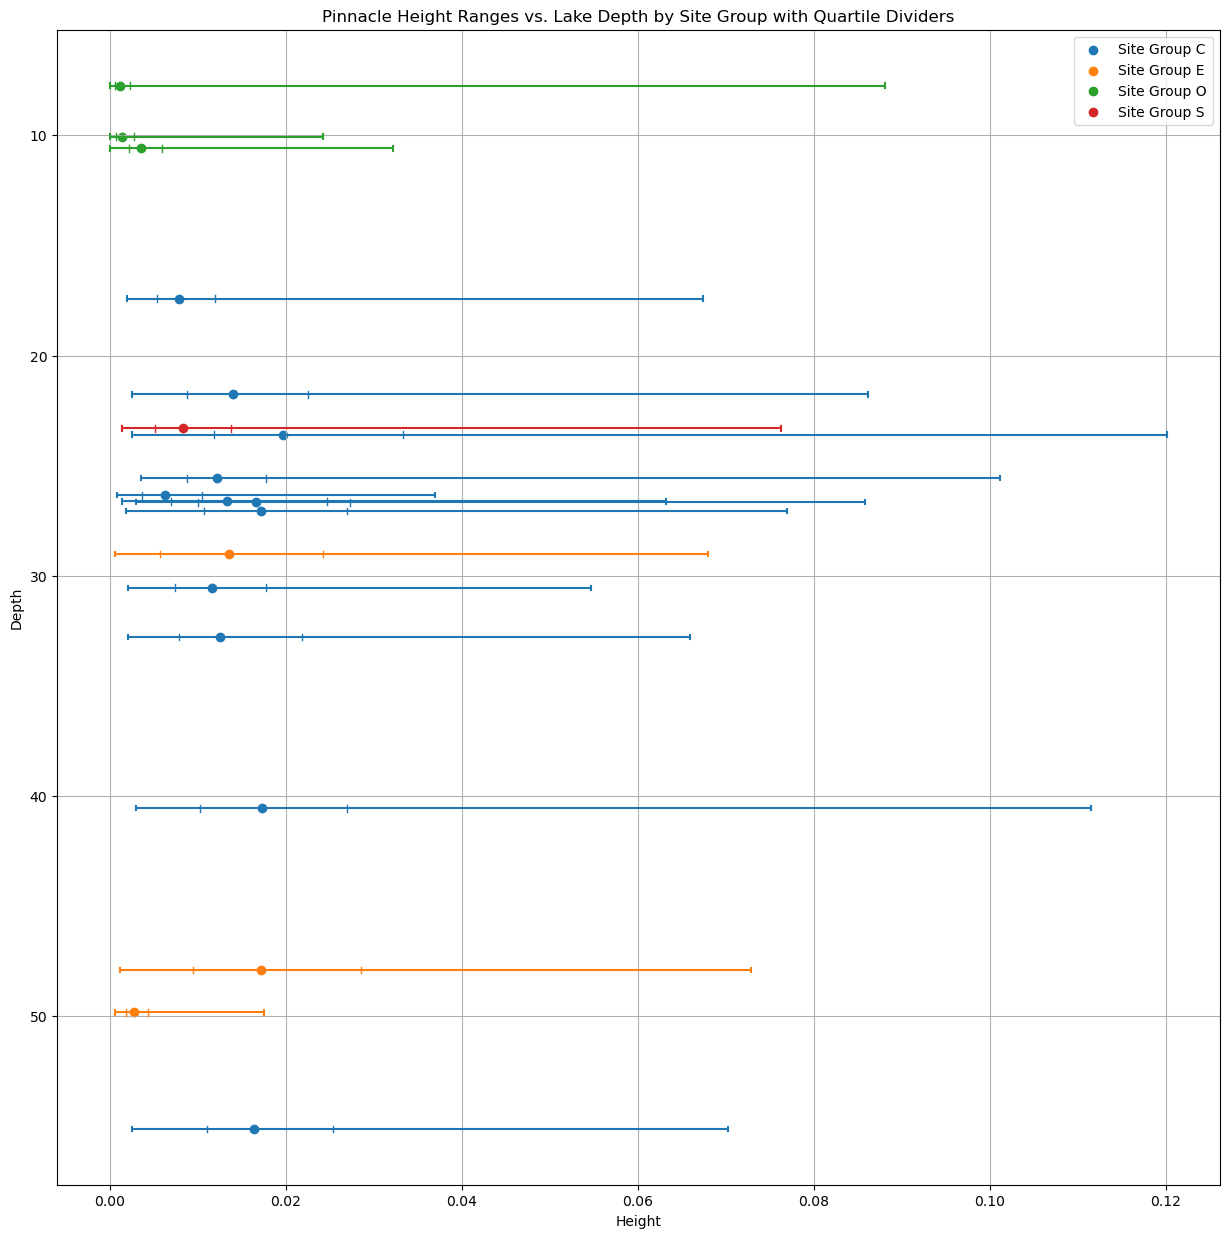

In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to folder with height CSV files and path to depth CSV file
height_folder_path = 'F:/dataprocessingstuff/phase2_separateclusters/testerheights'
depth_file_path = 'F:/dataprocessingstuff/phase2_separateclusters/sitesandheights.csv'

# Read the depth data
depth_df = pd.read_csv(depth_file_path)
depth_df.columns = ['Site', 'Depth']  # Ensure column names match your file

# Initialize dictionaries to store median, min, max, and quartiles
median_heights = {}
quartile_ranges = {}
min_max_ranges = {}

# Loop through each file in the height folder
for file_name in os.listdir(height_folder_path):
    if file_name.endswith('.csv'):
        # Extract site name from file name
        site_name = file_name.split('_')[0]
        
        # Read height data
        height_df = pd.read_csv(os.path.join(height_folder_path, file_name))
        
        # Calculate min, max, median, and quartiles
        median_height = height_df['Height'].median()
        q1 = height_df['Height'].quantile(0.25)
        q3 = height_df['Height'].quantile(0.75)
        min_height = height_df['Height'].min()
        max_height = height_df['Height'].max()
        
        # Store in dictionaries
        median_heights[site_name] = median_height
        quartile_ranges[site_name] = (q1, q3)
        min_max_ranges[site_name] = (min_height, max_height)

# Merge median heights with depth data
plot_data = depth_df.copy()
plot_data['Median_Height'] = plot_data['Site'].map(median_heights)
plot_data['Q1'] = plot_data['Site'].map(lambda x: quartile_ranges[x][0] if x in quartile_ranges else float('nan'))
plot_data['Q3'] = plot_data['Site'].map(lambda x: quartile_ranges[x][1] if x in quartile_ranges else float('nan'))
plot_data['Min'] = plot_data['Site'].map(lambda x: min_max_ranges[x][0] if x in min_max_ranges else float('nan'))
plot_data['Max'] = plot_data['Site'].map(lambda x: min_max_ranges[x][1] if x in min_max_ranges else float('nan'))

# Drop rows with missing values (in case any site is unmatched)
plot_data.dropna(inplace=True)

# Group the data by the first letter of the site name
plot_data['Site_Group'] = plot_data['Site'].str[0]  # Extract the first letter for grouping

# Define unique colors for each site group
site_groups = plot_data['Site_Group'].unique()
colors = plt.cm.tab10.colors  # Colormap with multiple colors
color_map = {group: colors[i % len(colors)] for i, group in enumerate(site_groups)}

# Plot each site group with a unique color and full range lines with quartile dividers
plt.figure(figsize=(15, 15))
for group, group_data in plot_data.groupby('Site_Group'):
    plt.scatter(group_data['Median_Height'], group_data['Depth'],
                color=color_map[group], label=f'Site Group {group}', marker='o')
    for _, row in group_data.iterrows():
        # Full range line (Min to Max) with thinner line
        plt.plot([row['Min'], row['Max']], [row['Depth'], row['Depth']],
                 color=color_map[group], linestyle='-', linewidth=1.5)  # Horizontal bar for full range
        
        # Add small vertical caps at Min and Max
        cap_length = 0.1  # Length of the vertical caps
        plt.plot([row['Min'], row['Min']], [row['Depth'] - cap_length, row['Depth'] + cap_length],
                 color=color_map[group], linewidth=1.5)  # Vertical cap at Min
        plt.plot([row['Max'], row['Max']], [row['Depth'] - cap_length, row['Depth'] + cap_length],
                 color=color_map[group], linewidth=1.5)  # Vertical cap at Max
        
        # Add longer vertical dividers for Q1, Median (Q2), and Q3 with slightly thinner lines
        divider_length = 0.15  # Increase length of vertical lines
        for quartile in [row['Q1'], row['Median_Height'], row['Q3']]:
            plt.plot([quartile, quartile], [row['Depth'] - divider_length, row['Depth'] + divider_length],
                     color=color_map[group], linewidth=1)  # Vertical line for each quartile

# Customizing the plot
plt.xlabel('Height')
plt.ylabel('Depth')
plt.title('Pinnacle Height Ranges vs. Lake Depth by Site Group with Quartile Dividers')
plt.gca().invert_yaxis()  # Invert y-axis for depth visualization
plt.legend()
plt.grid(True)

# Save the figure
output_directory = 'F:/dataprocessingstuff/phase2_separateclusters/moransfigs'  # Specify your output directory
output_file_path = os.path.join(output_directory, 'height_ranges_vs_depth_with_vertical_caps.png')
plt.savefig(output_file_path, format='png', bbox_inches='tight')  # Save the figure

# Show the plot
plt.show()

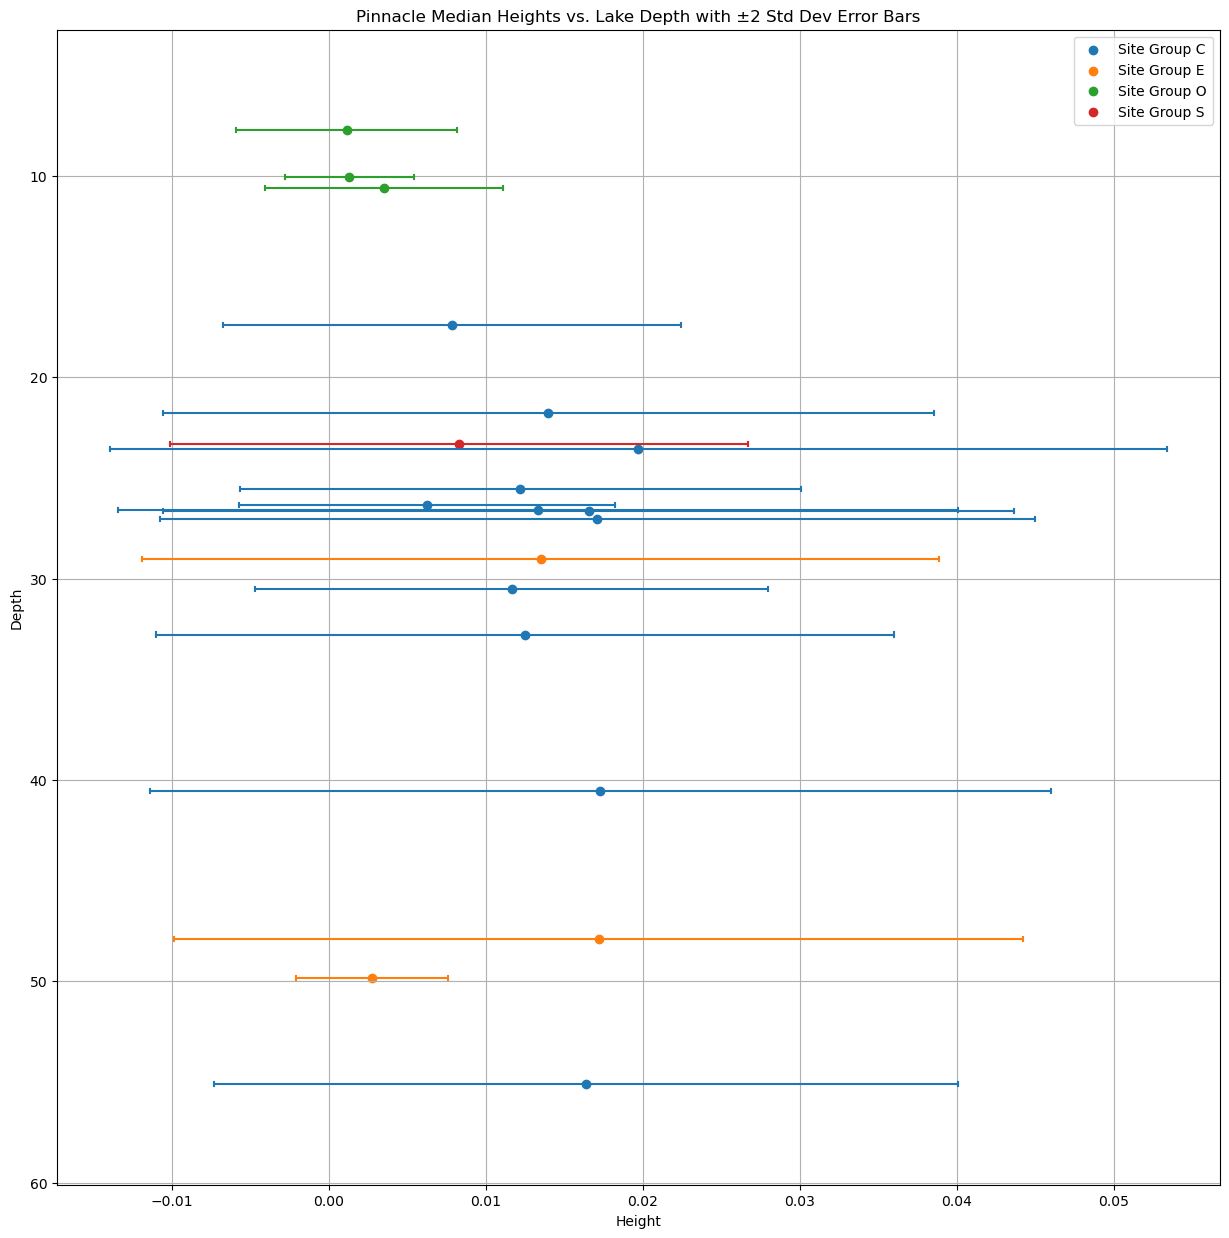

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to folder with height CSV files and path to depth CSV file
height_folder_path = 'F:/dataprocessingstuff/phase2_separateclusters/testerheights'
depth_file_path = 'F:/dataprocessingstuff/phase2_separateclusters/sitesandheights.csv'

# Read the depth data
depth_df = pd.read_csv(depth_file_path)
depth_df.columns = ['Site', 'Depth']  # Ensure column names match your file

# Initialize dictionaries to store median and standard deviation for each site
median_heights = {}
std_devs = {}

# Loop through each file in the height folder
for file_name in os.listdir(height_folder_path):
    if file_name.endswith('.csv'):
        # Extract site name from file name
        site_name = file_name.split('_')[0]
        
        # Read height data
        height_df = pd.read_csv(os.path.join(height_folder_path, file_name))
        
        # Calculate median and standard deviation
        median_height = height_df['Height'].median()
        std_dev = height_df['Height'].std()
        
        # Store in dictionaries
        median_heights[site_name] = median_height
        std_devs[site_name] = std_dev

# Merge median heights with depth data
plot_data = depth_df.copy()
plot_data['Median_Height'] = plot_data['Site'].map(median_heights)
plot_data['Std_Dev'] = plot_data['Site'].map(std_devs)

# Drop rows with missing values (in case any site is unmatched)
plot_data.dropna(inplace=True)

# Group the data by the first letter of the site name
plot_data['Site_Group'] = plot_data['Site'].str[0]  # Extract the first letter for grouping

# Define unique colors for each site group
site_groups = plot_data['Site_Group'].unique()
colors = plt.cm.tab10.colors  # Colormap with multiple colors
color_map = {group: colors[i % len(colors)] for i, group in enumerate(site_groups)}

# Plot each site group with unique color and error bars for standard deviation
plt.figure(figsize=(15, 15))  # Increase figure height to add vertical space
for group, group_data in plot_data.groupby('Site_Group'):
    plt.scatter(group_data['Median_Height'], group_data['Depth'],
                color=color_map[group], label=f'Site Group {group}', marker='o')
    for _, row in group_data.iterrows():
        # Calculate error bounds (median ± 2*std_dev)
        error_lower = row['Median_Height'] - 2 * row['Std_Dev']
        error_upper = row['Median_Height'] + 2 * row['Std_Dev']
        
        # Horizontal error bar for the range of ±2 standard deviations
        plt.plot([error_lower, error_upper], [row['Depth'], row['Depth']],
                 color=color_map[group], linestyle='-', linewidth=1.5)  # Horizontal line for ±2 std dev range
        
        # Add small vertical caps at the ends of the error bar
        cap_length = 0.1  # Length of the vertical caps
        plt.plot([error_lower, error_lower], [row['Depth'] - cap_length, row['Depth'] + cap_length],
                 color=color_map[group], linewidth=1.5)  # Vertical cap at lower end
        plt.plot([error_upper, error_upper], [row['Depth'] - cap_length, row['Depth'] + cap_length],
                 color=color_map[group], linewidth=1.5)  # Vertical cap at upper end

# Customizing the plot
plt.xlabel('Height')
plt.ylabel('Depth')
plt.title('Pinnacle Median Heights vs. Lake Depth with ±2 Std Dev Error Bars')

# Remove plt.gca().invert_yaxis() to keep y-axis with shallowest depth at the top
# Set y-axis limits to add extra space
# Reverse the y-axis to plot shallowest depth at the top
y_min, y_max = plot_data['Depth'].min(), plot_data['Depth'].max()
plt.ylim(y_max + 5, y_min - 5)  # Ensure shallowest depth (max) is at the top


plt.legend()
plt.grid(True)

# Save the figure
output_directory = 'F:/dataprocessingstuff/phase2_separateclusters/moransfigs'  # Specify your output directory
output_file_path = os.path.join(output_directory, 'median_height_std_dev_error_bars.png')
plt.savefig(output_file_path, format='png', bbox_inches='tight')  # Save the figure

# Show the plot
plt.show()

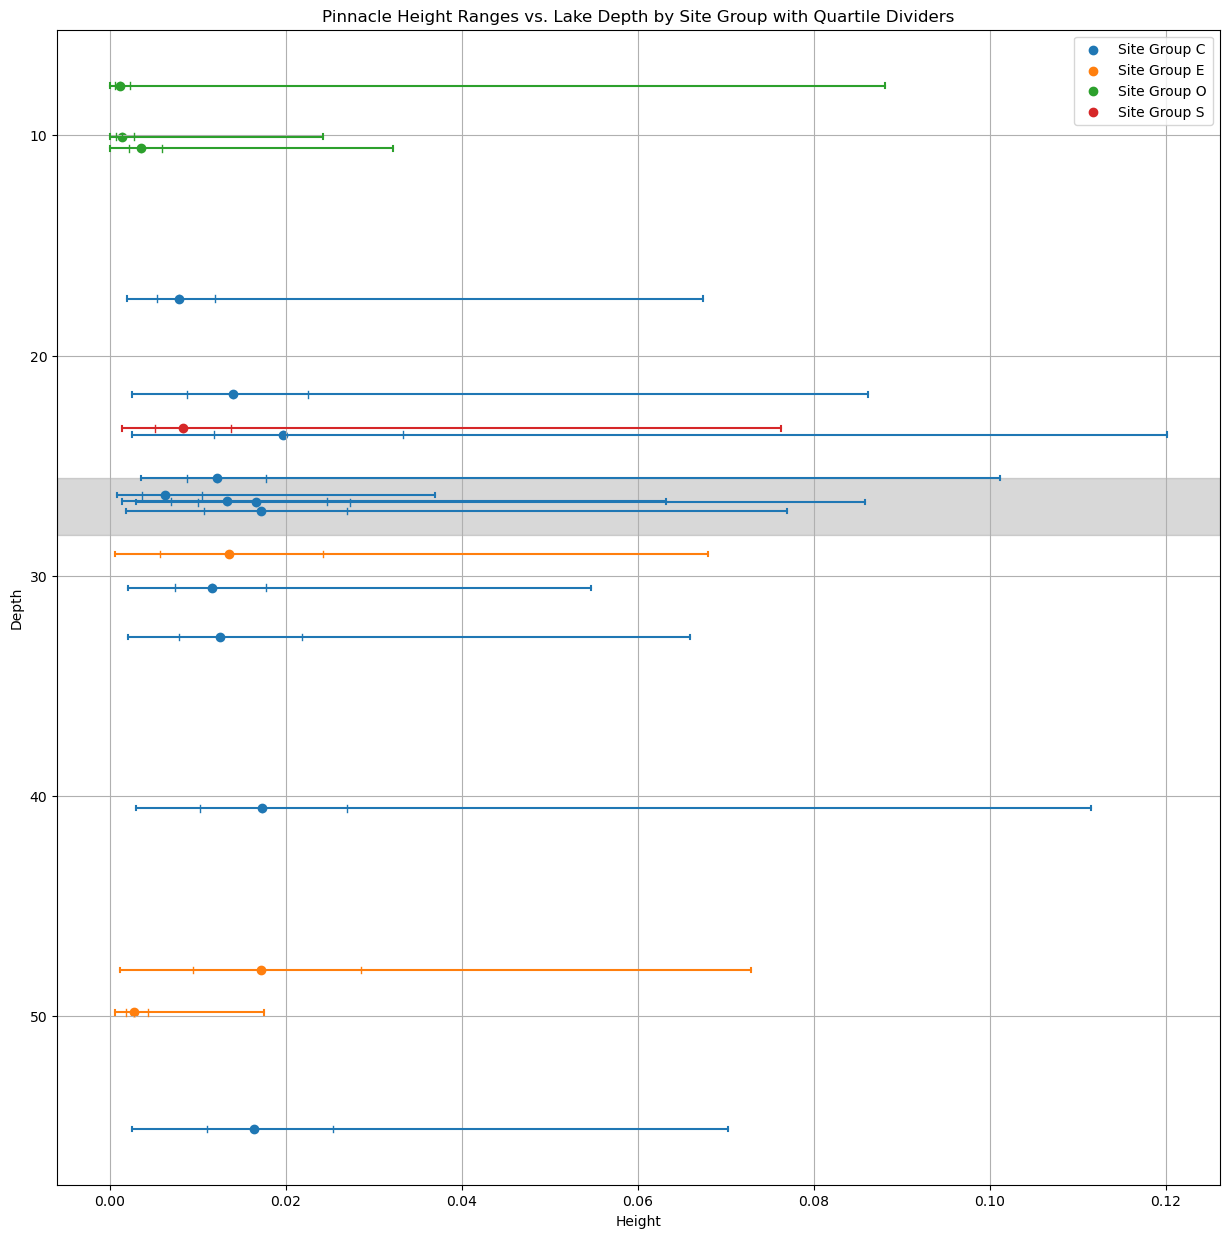

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to folder with height CSV files and path to depth CSV file
height_folder_path = 'F:/dataprocessingstuff/phase2_separateclusters/testerheights'
depth_file_path = 'F:/dataprocessingstuff/phase2_separateclusters/sitesandheights.csv'

# Read the depth data
depth_df = pd.read_csv(depth_file_path)
depth_df.columns = ['Site', 'Depth']  # Ensure column names match your file

# Initialize dictionaries to store median, min, max, and quartiles
median_heights = {}
quartile_ranges = {}
min_max_ranges = {}

# Loop through each file in the height folder
for file_name in os.listdir(height_folder_path):
    if file_name.endswith('.csv'):
        # Extract site name from file name
        site_name = file_name.split('_')[0]
        
        # Read height data
        height_df = pd.read_csv(os.path.join(height_folder_path, file_name))
        
        # Calculate min, max, median, and quartiles
        median_height = height_df['Height'].median()
        q1 = height_df['Height'].quantile(0.25)
        q3 = height_df['Height'].quantile(0.75)
        min_height = height_df['Height'].min()
        max_height = height_df['Height'].max()
        
        # Store in dictionaries
        median_heights[site_name] = median_height
        quartile_ranges[site_name] = (q1, q3)
        min_max_ranges[site_name] = (min_height, max_height)

# Merge median heights with depth data
plot_data = depth_df.copy()
plot_data['Median_Height'] = plot_data['Site'].map(median_heights)
plot_data['Q1'] = plot_data['Site'].map(lambda x: quartile_ranges[x][0] if x in quartile_ranges else float('nan'))
plot_data['Q3'] = plot_data['Site'].map(lambda x: quartile_ranges[x][1] if x in quartile_ranges else float('nan'))
plot_data['Min'] = plot_data['Site'].map(lambda x: min_max_ranges[x][0] if x in min_max_ranges else float('nan'))
plot_data['Max'] = plot_data['Site'].map(lambda x: min_max_ranges[x][1] if x in min_max_ranges else float('nan'))

# Drop rows with missing values (in case any site is unmatched)
plot_data.dropna(inplace=True)

# Group the data by the first letter of the site name
plot_data['Site_Group'] = plot_data['Site'].str[0]  # Extract the first letter for grouping

# Define unique colors for each site group
site_groups = plot_data['Site_Group'].unique()
colors = plt.cm.tab10.colors  # Colormap with multiple colors
color_map = {group: colors[i % len(colors)] for i, group in enumerate(site_groups)}

# Plot each site group with a unique color and full range lines with quartile dividers
plt.figure(figsize=(15, 15))

# Add the translucent gray block between depths 25.57 and 28.15
plt.axhspan(25.57, 28.15, color='gray', alpha=0.3)  # Adjust alpha for transparency

for group, group_data in plot_data.groupby('Site_Group'):
    plt.scatter(group_data['Median_Height'], group_data['Depth'],
                color=color_map[group], label=f'Site Group {group}', marker='o')
    for _, row in group_data.iterrows():
        # Full range line (Min to Max) with thinner line
        plt.plot([row['Min'], row['Max']], [row['Depth'], row['Depth']],
                 color=color_map[group], linestyle='-', linewidth=1.5)  # Horizontal bar for full range
        
        # Add small vertical caps at Min and Max
        cap_length = 0.1  # Length of the vertical caps
        plt.plot([row['Min'], row['Min']], [row['Depth'] - cap_length, row['Depth'] + cap_length],
                 color=color_map[group], linewidth=1.5)  # Vertical cap at Min
        plt.plot([row['Max'], row['Max']], [row['Depth'] - cap_length, row['Depth'] + cap_length],
                 color=color_map[group], linewidth=1.5)  # Vertical cap at Max
        
        # Add longer vertical dividers for Q1, Median (Q2), and Q3 with slightly thinner lines
        divider_length = 0.15  # Increase length of vertical lines
        for quartile in [row['Q1'], row['Median_Height'], row['Q3']]:
            plt.plot([quartile, quartile], [row['Depth'] - divider_length, row['Depth'] + divider_length],
                     color=color_map[group], linewidth=1)  # Vertical line for each quartile

# Customizing the plot
plt.xlabel('Height')
plt.ylabel('Depth')
plt.title('Pinnacle Height Ranges vs. Lake Depth by Site Group with Quartile Dividers')
plt.gca().invert_yaxis()  # Invert y-axis for depth visualization
plt.legend()
plt.grid(True)

# Save the figure
output_directory = 'F:/dataprocessingstuff/phase2_separateclusters/moransfigs'  # Specify your output directory
output_file_path = os.path.join(output_directory, 'height_ranges_vs_depth_with_vertical_caps.png')
plt.savefig(output_file_path, format='png', bbox_inches='tight')  # Save the figure

# Show the plot
plt.show()